## Glass Classification

## About Dataset
### Context
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

### Content
### Attribute Information:

**Id number:** 1 to 214 (removed from CSV file)<br>
**RI:** refractive index<br>
**Na:** Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)<br>
**Mg:** Magnesium<br>
**Al:** Aluminum<br>
**Si:** Silicon<br>
**K:** Potassium<br>
**Ca:** Calcium<br>
**Ba:** Barium<br>
**Fe:** Iron<br>
### Type of glass: (class attribute)
-- 1 building_windows_float_processed<br>
-- 2 building_windows_non_float_processed<br>
-- 3 vehicle_windows_float_processed<br>
-- 4 vehicle_windows_non_float_processed (none in this database)<br>
-- 5 containers<br>
-- 6 tableware<br>
-- 7 headlamps<br>

In [1]:
# Imports

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("glass.csv")
df.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
53,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.0,0.00,1
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.00,2
114,1.51847,13.10,3.97,1.19,72.44,0.60,8.43,0.0,0.00,2
121,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,0.0,0.21,2
63,1.52227,14.17,3.81,0.78,71.35,0.00,9.69,0.0,0.00,1
26,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,1
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.0,0.00,1
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.0,0.00,5
168,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.0,0.00,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
# Checking for null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
# Checking for duplicated values

duplicated = len(df[df.duplicated()])
print(f'There ara {duplicated} duplicated rows')

There ara 1 duplicated rows


In [7]:
df.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<Axes: >

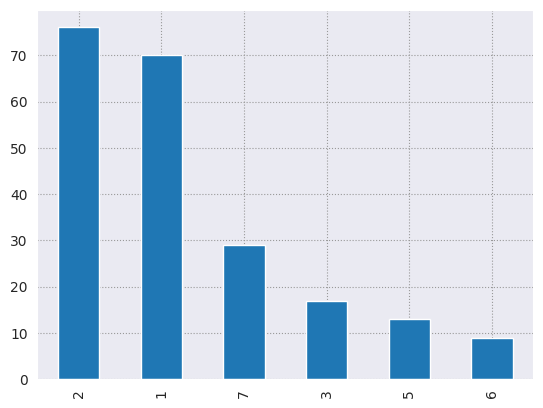

In [8]:
# Checking the balance of the data
df['Type'].value_counts().plot(kind='bar')

Data seems to be unbalanced as the type 6 and type 5 glass are very less compared to other types of glasses which in turn can create some problem in traning of our model and there do not exist glass of type 4

## Explotory Data Analysis

In [9]:
df.corr()['Type'].sort_values(ascending = False)

Type    1.000000
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64

In [10]:
import plotly.express as px

df_corr_bar = df.corr().Type.sort_values()[:-1]
fig = px.bar(df_corr_bar, orientation="v", color_discrete_sequence=["#9490af"])
fig.update_layout(showlegend=False)
fig.show()

## Corelation Matrix

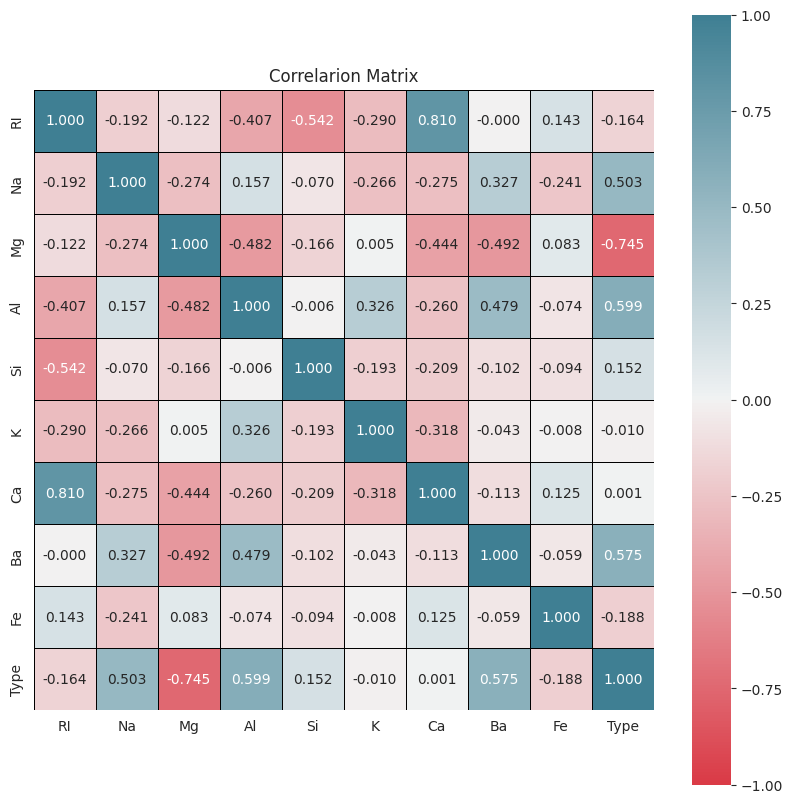

In [11]:
plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(
    data=df.corr(), 
    vmin=-1.0, 
    vmax=1.0, 
    center=0, 
    cmap=cmap, 
    square=True,
    linewidths=0.5, 
    linecolor='k',
    annot=True, 
    fmt='.3f',

)
plt.title('Correlarion Matrix')
plt.show()

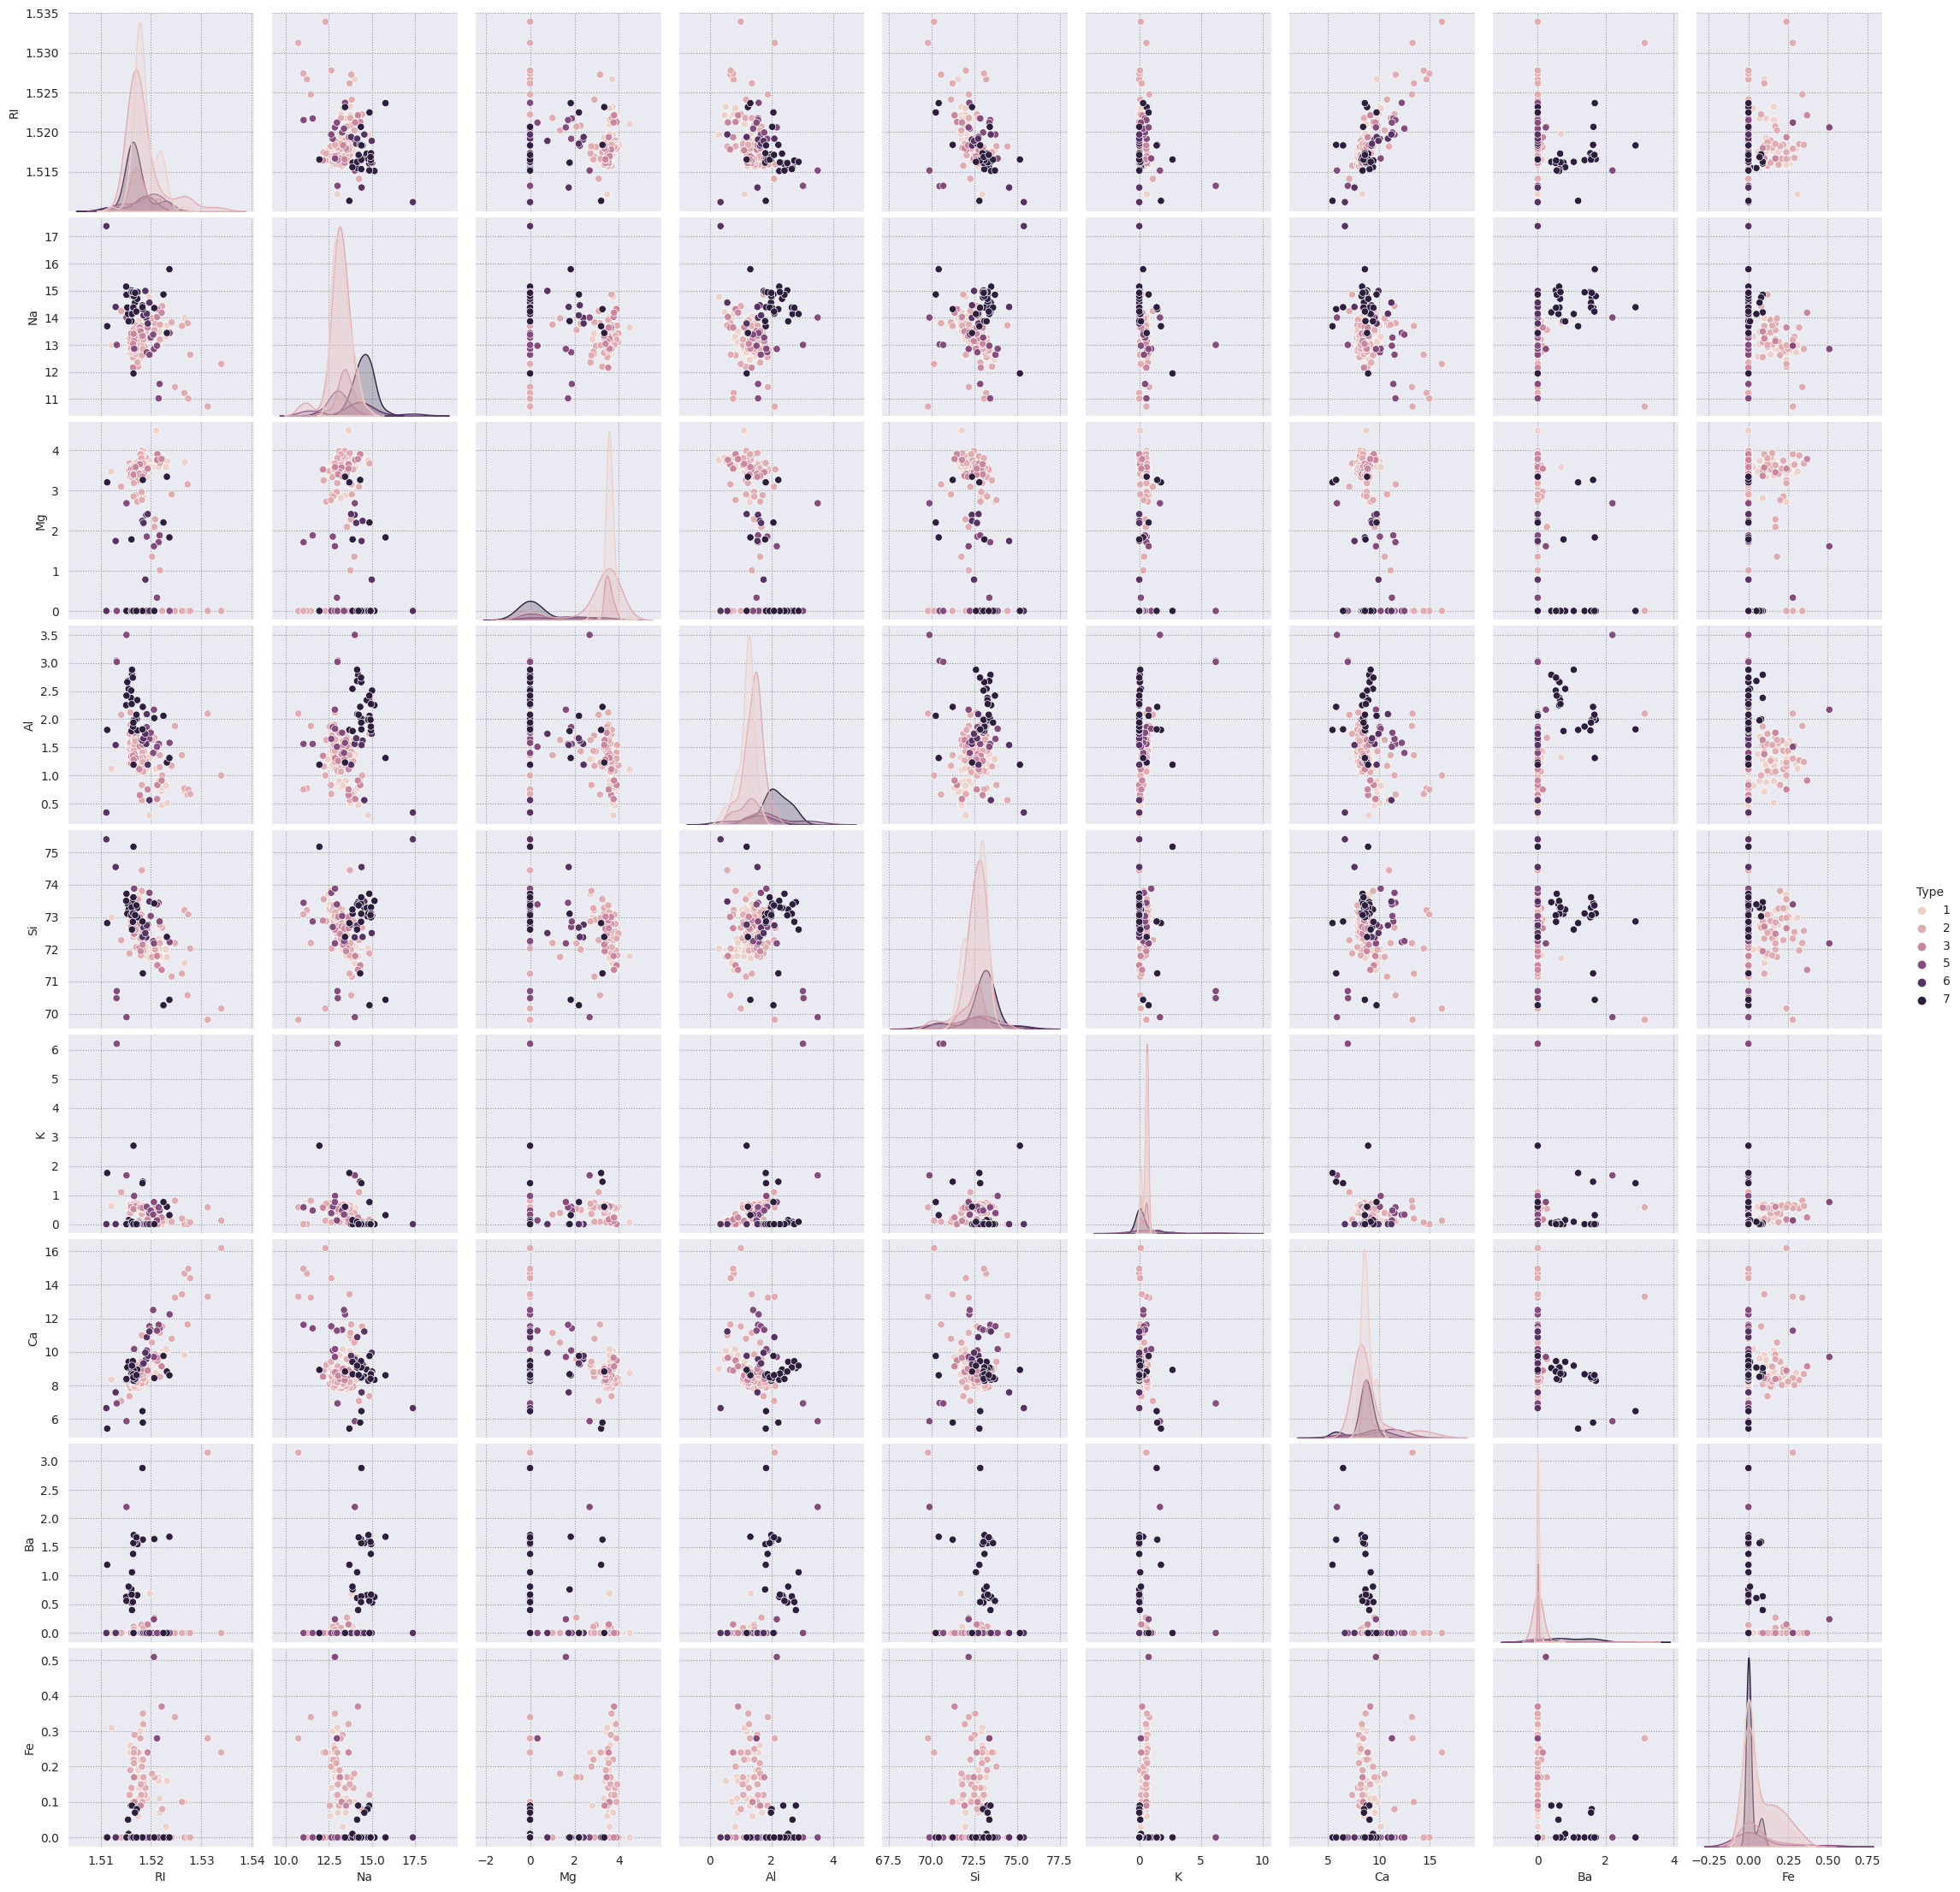

In [12]:
sns.pairplot(df,hue='Type')

In [13]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

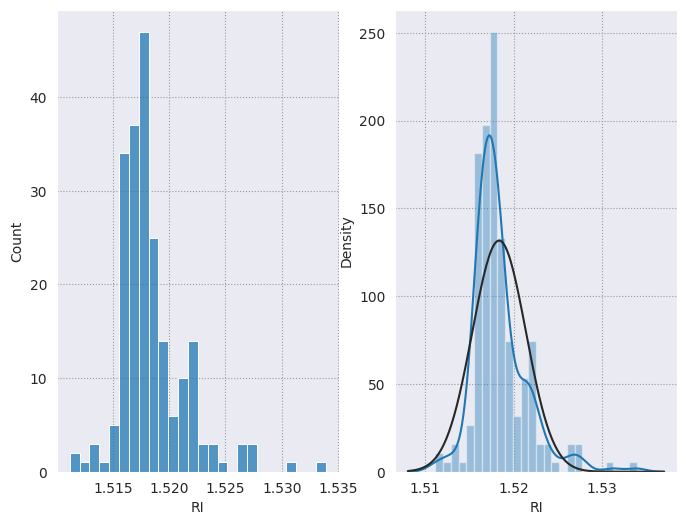

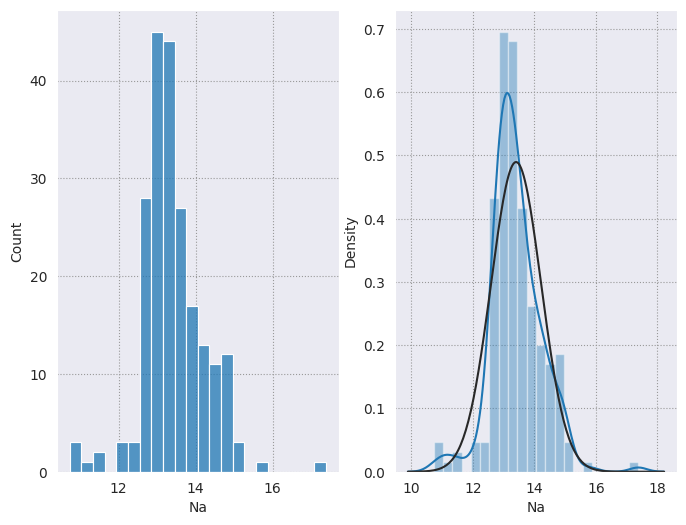

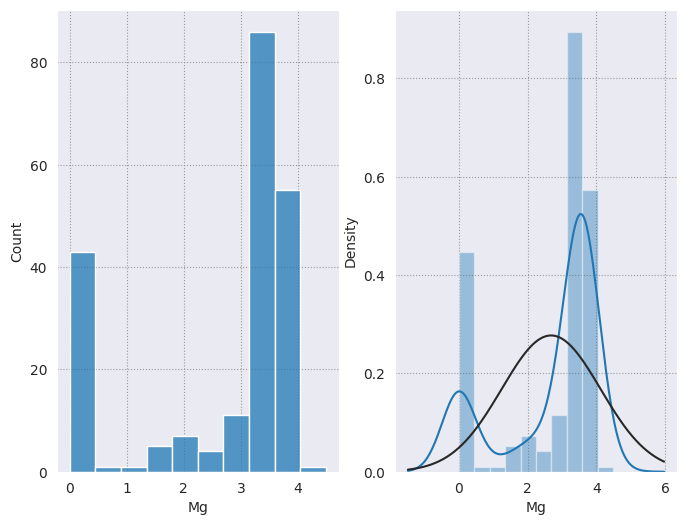

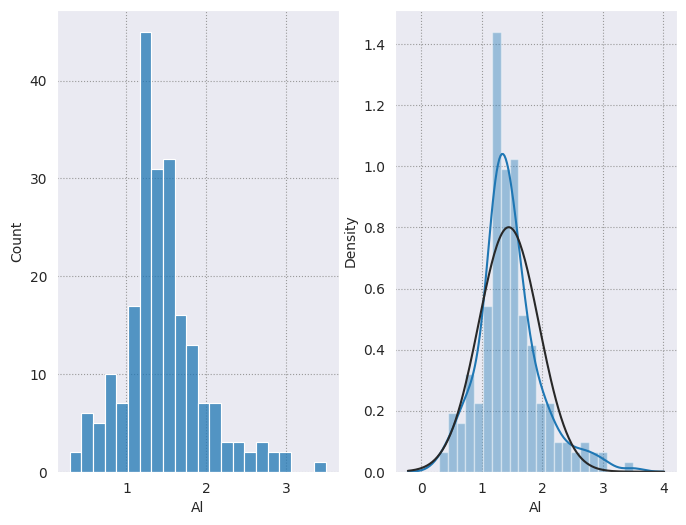

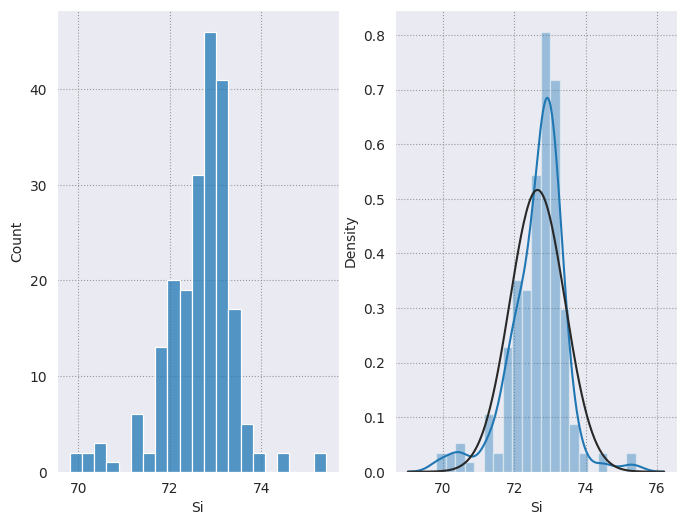

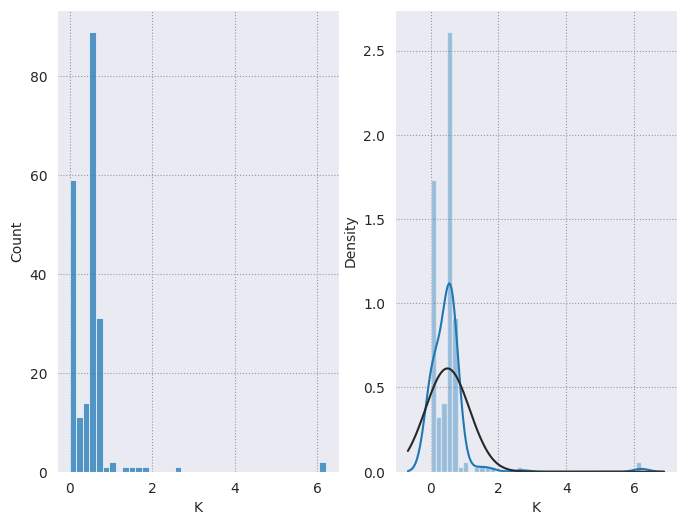

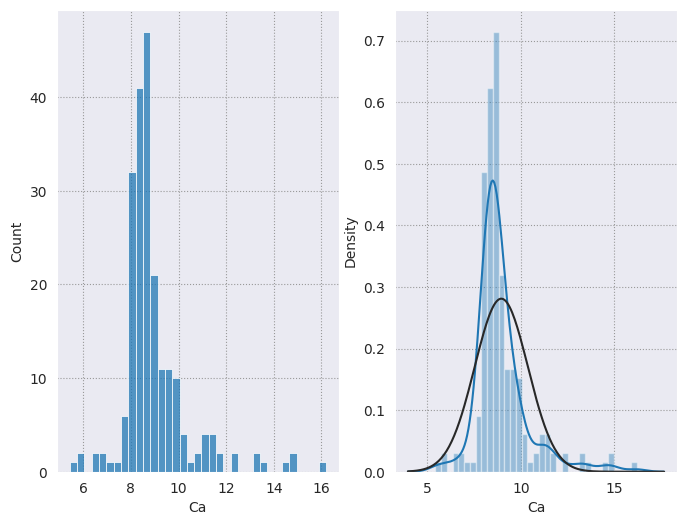

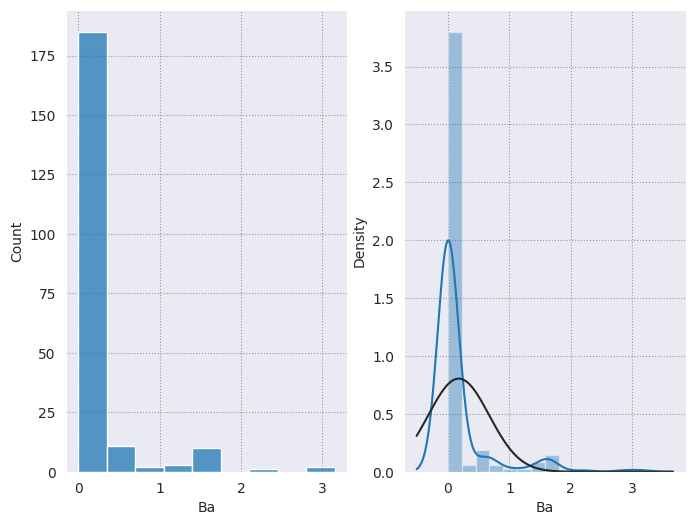

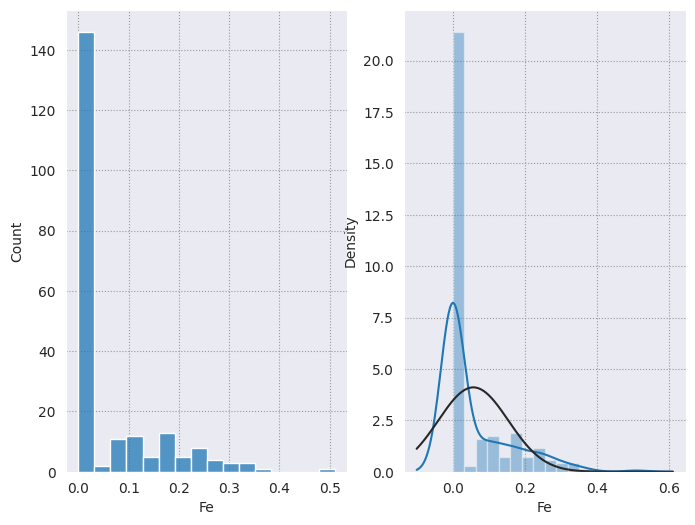

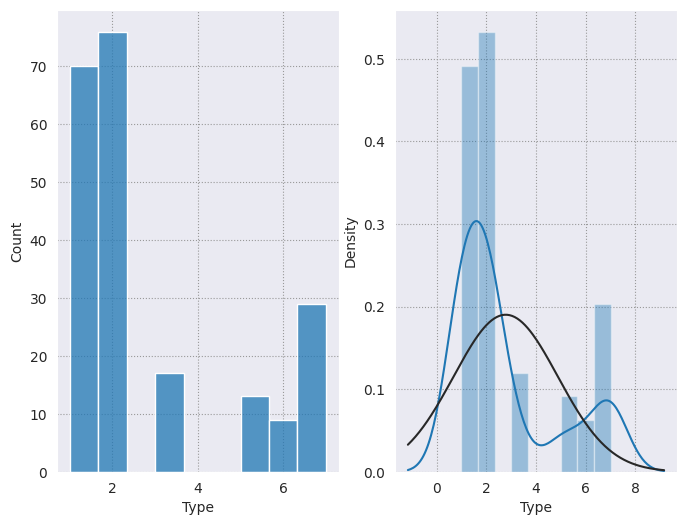

In [14]:
for col in df.columns:
    fig, axes = plt.subplots(figsize=(8, 6), nrows=1, ncols=2)
    sns.histplot(df[col], ax=axes[0])
    sns.distplot(df[col], ax=axes[1], fit=stats.norm)
    plt.show()

## Preparing the data

In [15]:
X = df.drop(['Type'], axis = 1)
y = df['Type']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((149, 9), (65, 9), (149,), (65,))

<Axes: xlabel='Type', ylabel='count'>

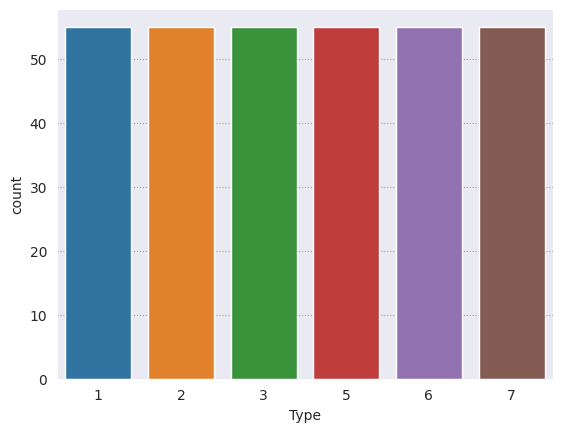

In [31]:
# Balancing the data
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
sns.countplot(x=y_train)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

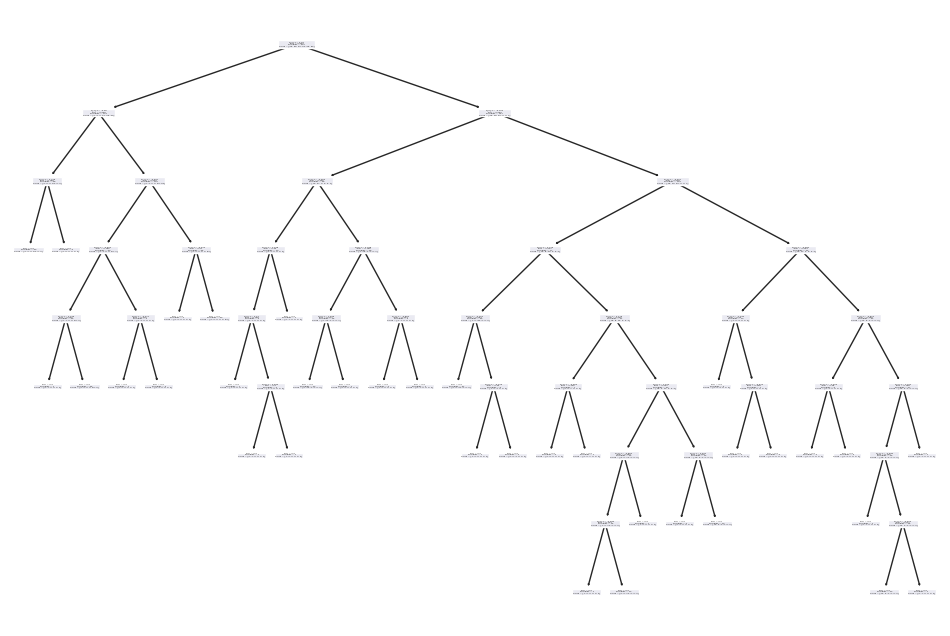

In [34]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf.fit(X_train, y_train))
plt.show()

In [35]:
predict = clf.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       0.74      0.93      0.82        15
           2       0.86      0.72      0.78        25
           3       0.60      0.43      0.50         7
           5       0.40      1.00      0.57         2
           6       1.00      1.00      1.00         1
           7       0.93      0.87      0.90        15

    accuracy                           0.78        65
   macro avg       0.75      0.82      0.76        65
weighted avg       0.81      0.78      0.78        65



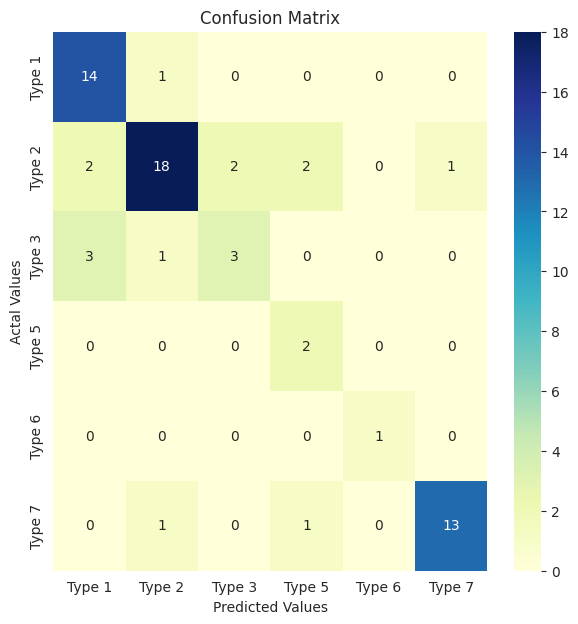

In [36]:
cm = confusion_matrix(y_test, predict)
cm_df = pd.DataFrame(cm,
                     index = ['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'],
                     columns = ['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'] )

#Plotting the confusion matrix
plt.figure(figsize=(7,7))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Model Tunning

In [37]:
parameters = {  'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1,2,4,5, 10, 20,],
    'criterion': ["gini", "entropy"] }


In [38]:
dtc = DecisionTreeClassifier()
model = GridSearchCV(dtc , parameters , cv = 5 , scoring = 'accuracy')
model.fit(X_train, y_train)
print (model.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}


In [39]:
new_model = model.best_estimator_
new_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [40]:
y_pred = new_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.87      0.72        15
           2       0.83      0.76      0.79        25
           3       0.67      0.29      0.40         7
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      0.87      0.93        15

    accuracy                           0.77        65
   macro avg       0.77      0.80      0.75        65
weighted avg       0.79      0.77      0.76        65



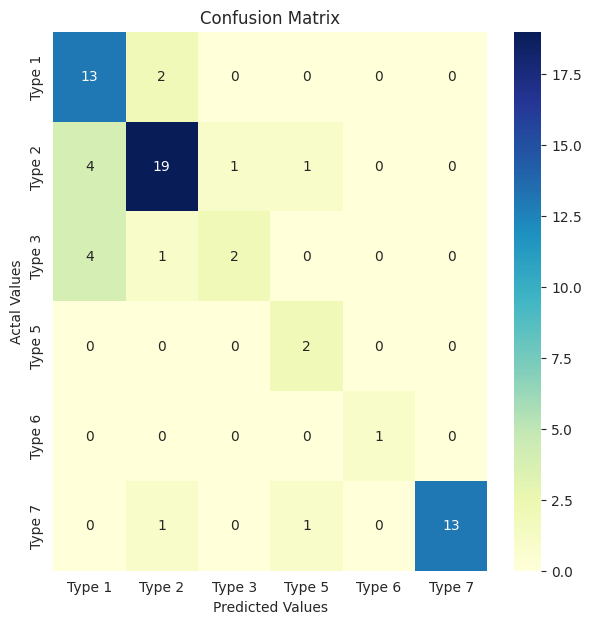

In [41]:
cm2 = confusion_matrix(y_test, y_pred)
cm_df2 = pd.DataFrame(cm2,
                     index = ['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'],
                     columns = ['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'] )

#Plotting the confusion matrix
plt.figure(figsize=(7,7))
sns.heatmap(cm_df2, annot=True,cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## ★·.·´¯`·.·★ Ｔℍᗩ𝕟Ⓚ ㄚ𝕠𝓤 ★·.·´¯`·.·★